# Case Study_Human Resourse Dataset

* <b>Human_Resources.csv<b/> Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

#### Task 1:Import your libraries

In [ ]:
#Import the libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import OneHotEncoder


In [17]:
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# show all the file data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
# Show the following basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Task 2:VISUALIZE DATASET

In [20]:
# Replace 'Attritition','Overtime' and 'Over18' columns with integers before performing any visualizations 
# Replace 'Attrition' column with integers
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Replace 'OverTime' column with integers
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Replace 'Over18' column with integers
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [21]:
# display the current first four records
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [22]:
# Drop EmployeeNumber',EmployeeCount' ,'Standardhours' and 'Over18' since they do not change from one employee to the other
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [23]:
employee_df = df.copy()
# Let's see how many employees left the company! 
left_df        = employee_df[employee_df['Attrition'] == 1]
stayed_df      = employee_df[employee_df['Attrition'] == 0]

In [24]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 

total_employees = len(employee_df)
left_count = len(left_df)
stayed_count = len(stayed_df)
left_percentage = (left_count / total_employees) * 100
stayed_percentage = (stayed_count / total_employees) * 100

print(f"Total employees: {total_employees}")
print(f"Number of employees who left the company: {left_count}")
print(f"Percentage of employees who left the company: {left_percentage:.2f} %")
print(f"Number of employees who did not leave the company (stayed): {stayed_count}")
print(f"Percentage of employees who did not leave the company (stayed): {stayed_percentage:.2f} %")

Total employees: 1470
Number of employees who left the company: 237
Percentage of employees who left the company: 16.12 %
Number of employees who did not leave the company (stayed): 1233
Percentage of employees who did not leave the company (stayed): 83.88 %


<Axes: >

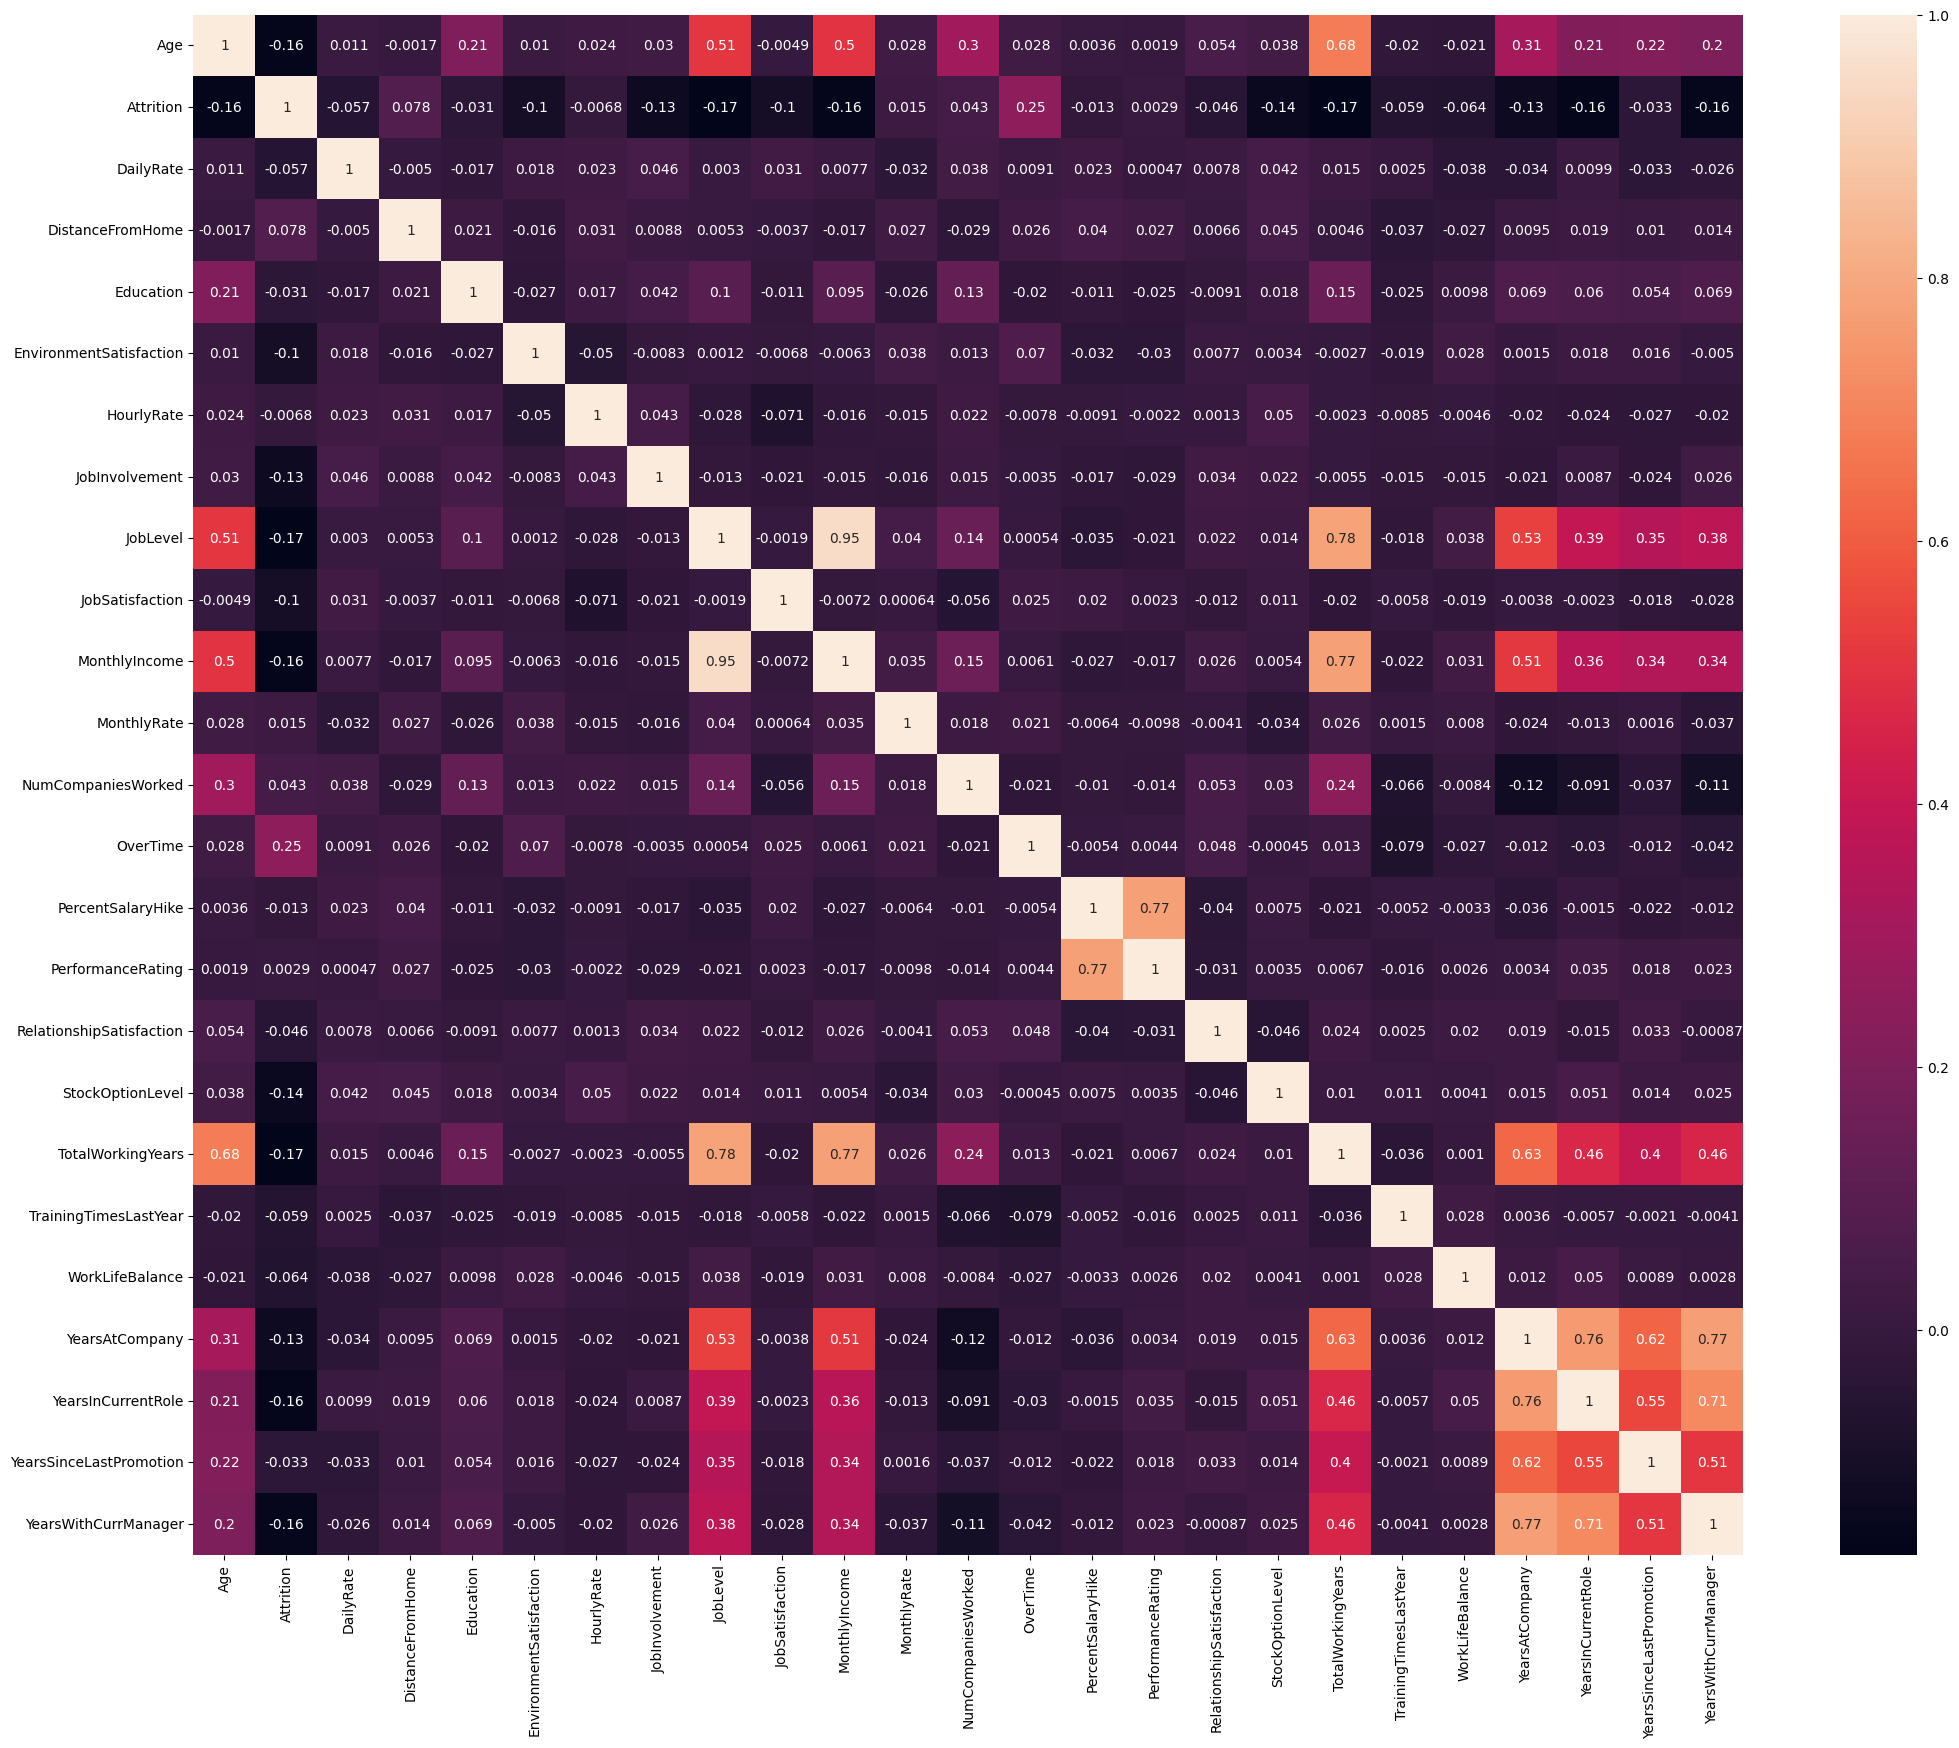

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
# Select Columns for Correlation
numeric_df = df.select_dtypes(include=[float, int])
# Calculate Correlation Matrix for Selected Columns
df_correlation = numeric_df.corr()

plt.figure(figsize=(25,20))
sns.heatmap(df_correlation, annot=True)

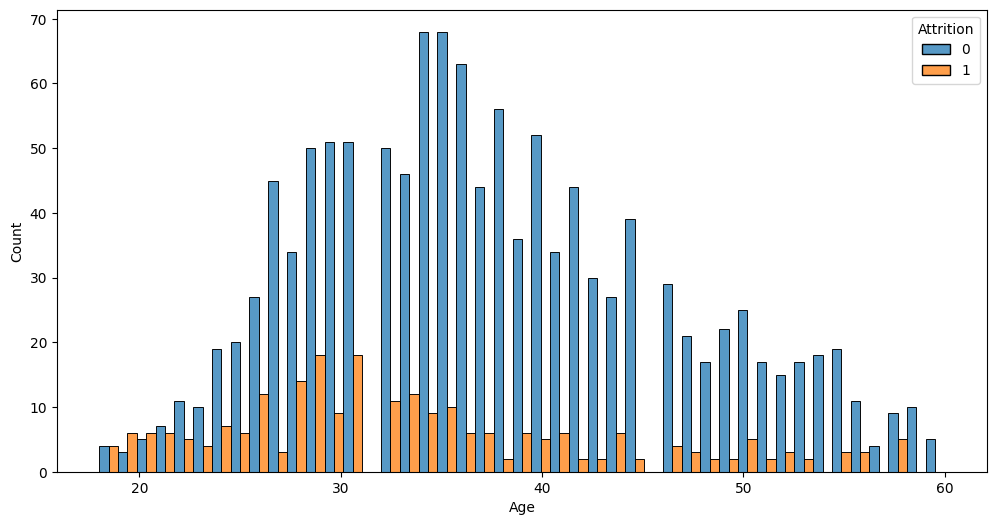

In [28]:
# Plotting a histogram of the 'Age' column
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x='Age',bins=45,hue='Attrition',multiple="dodge")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


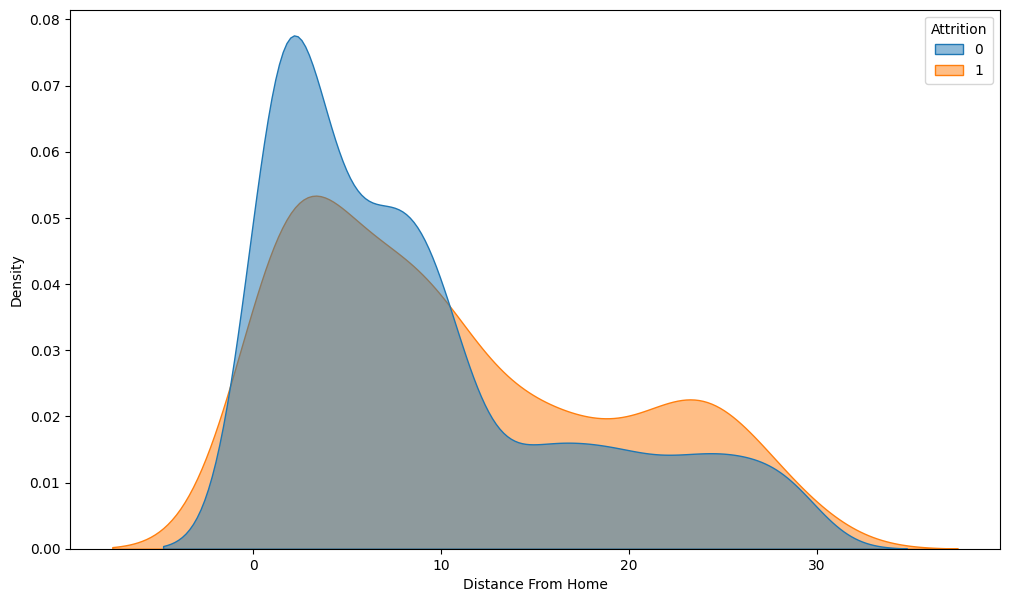

In [29]:
# create a Kernel Density Estimate comparing 'Employees who left' and 'Employees who Stayed' using 'Distance From Home'
plt.figure(figsize=(12,7))
sns.kdeplot(data=df,x='DistanceFromHome',hue='Attrition',fill=True,common_norm=False,alpha=0.5)
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.show()




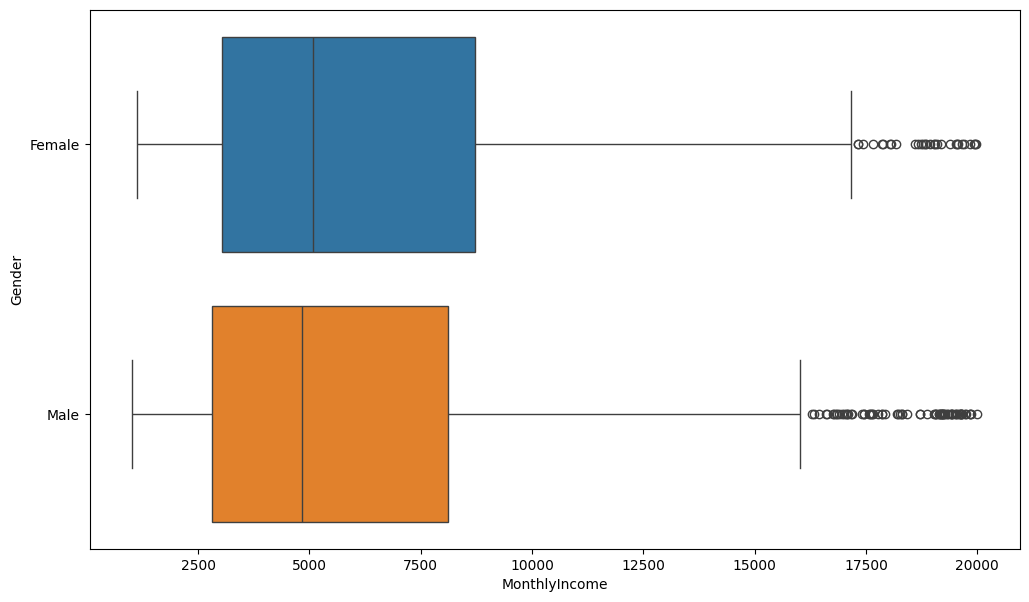

In [30]:
# Let's see the Gender vs. Monthly Income using box plots
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='MonthlyIncome',y='Gender',hue='Gender')
plt.xlabel('MonthlyIncome')
plt.ylabel('Gender')
plt.show()

## Task 4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [32]:
categorical_cols = employee_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(employee_df[categorical_cols])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded ones
employee_df = employee_df.drop(columns=categorical_cols).reset_index(drop=True)
employee_df = pd.concat([employee_df, encoded_df], axis=1)
employee_df
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)


# Identify categorical columns (object dtype)
categorical_columns = df.select_dtypes(include=['object']).columns

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2,87,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
# select your features here i.e. drop the target 'Atrittion'
X = df.drop('Attrition', axis=1)
X


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
from sklearn.preprocessing import StandardScaler

# scale your features data assigning it variable X
scaler = StandardScaler()
X = scaler.fit_transform(df_features)
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [36]:
# select your dependent, target or response data as "Attrition" using variable y
y= df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [41]:
from sklearn.cluster import KMeans

# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


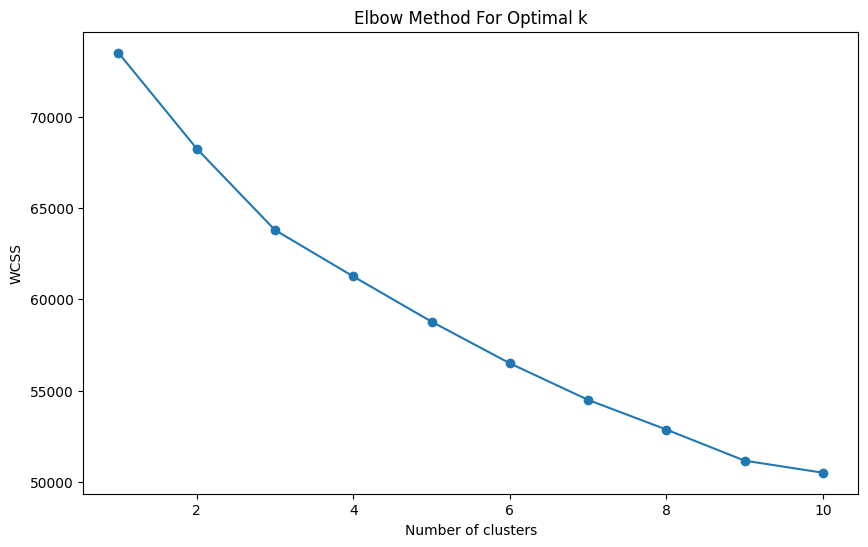

In [42]:
# Create a visualization for Finding the right number of clusters - Elbow method'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## APPLY K-MEANS METHOD

In [43]:
# Apply KMeans with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataframe
employee_df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
employee_df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Cluster
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,27,0,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
# Check size of each cluster - Are they all representative ?
# Check the size of each cluster
cluster_sizes = employee_df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    818
2    399
1    253
Name: count, dtype: int64


## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [46]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[-0.0234771 , -2.29498375],
       [ 0.04824099,  1.53280418],
       [-2.91944898,  1.0023716 ],
       ...,
       [-1.06745272,  1.27022263],
       [ 1.18308284, -1.99420826],
       [-1.48078064,  1.10151924]])

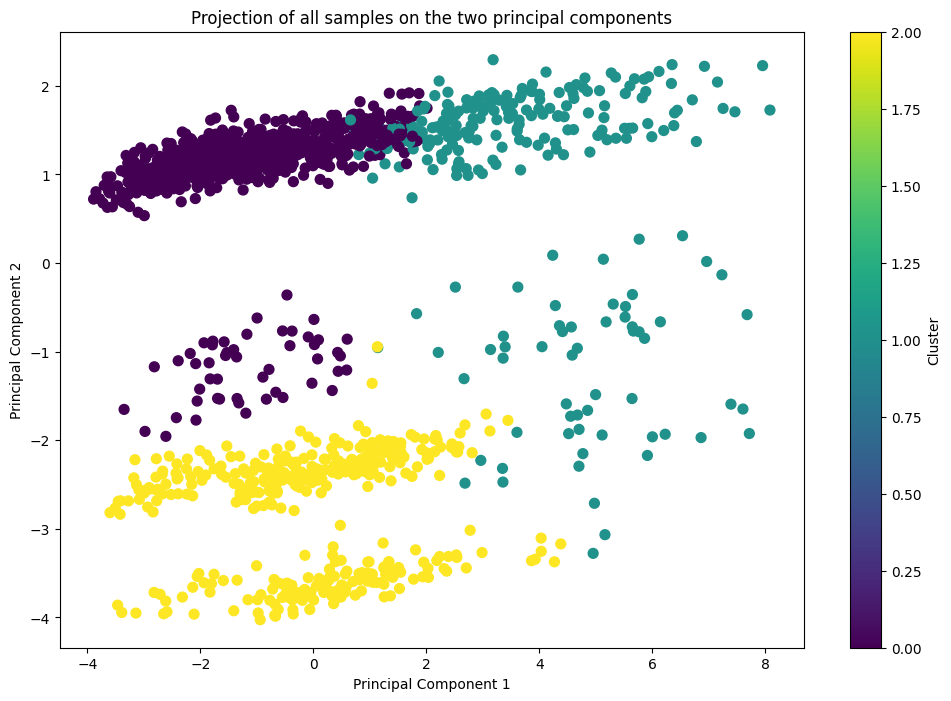

(1470, 2)

In [48]:
# All samples projected on the two principal components
plt.figure(figsize=(12, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of all samples on the two principal components')
plt.colorbar(label='Cluster')
plt.show()
principal_components.shape

In [49]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.head()

,Principal Component 1,Principal Component 2
0,-0.023477,-2.294984
1,0.048241,1.532804
2,-2.919449,1.002372
3,-1.185131,1.061926
4,-2.124228,1.178367


In [51]:
# Concatenate the clusters labels to the dataframe
employee_df = pd.concat([employee_df, pd.DataFrame(kmeans.labels_, columns=['Cluster'])], axis=1)
employee_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Cluster,Cluster,Cluster
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2,2
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
4,27,0,591,2,1,1,40,3,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0


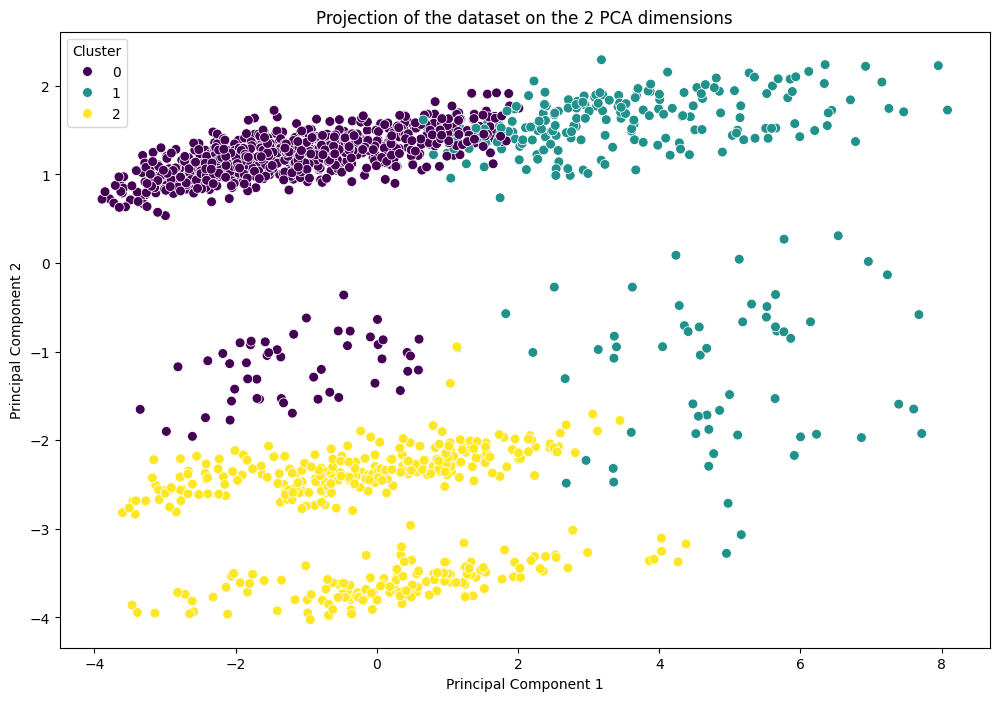

In [52]:
# Create a scatterplot visual of Projection of the dataset on the 2 PCA dimensions'
plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans.labels_, palette='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.legend(title='Cluster')
plt.show()

In [53]:
# show the % of the total variance explained by each principal component. Overall close to 48% explained by these two.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance by the first two components: {explained_variance.sum() * 100:.2f}%")

Explained variance by each component: [0.10704652 0.07010867]
Total explained variance by the first two components: 17.72%


## AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#import the autoencoder libraries


In [57]:
# create your autoencoder with all the features showing Encoder, bottleneck, decoder, autoencoder 
# compile the autoencoder using optimizer='adam', loss='mean_squared_error'
input_dim = encoded_data.shape[1]
encoding_dim = 14  # This can be adjusted

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(encoding_dim // 2, activation='relu')(encoder)

# Decoder
decoder = Dense(encoding_dim, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [59]:
# show the autoencoder summary
# show the autoencoder summary
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985 (3.85 KB)

 Trainable params: 985 (3.85 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
## Train autoencoder using input = output
# Train the autoencoder
history = autoencoder.fit(encoded_data, encoded_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2474 - val_loss: 0.2274
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2166 - val_loss: 0.1735
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1611 - val_loss: 0.1373
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1322 - val_loss: 0.1259
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1219 - val_loss: 0.1177
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1143 - val_loss: 0.1100
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1055 - val_loss: 0.1029
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1024 - val_loss: 0.0973
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0951 - val_loss: 0.0921
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0905 - val_loss: 0.0869
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0852 - val_loss: 0.0818
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0796 - val_l

In [61]:
# Use Autoencoder to reduce the number of features / dimensions and show the dimensions
# Use the encoder part of the autoencoder to reduce the dimensions
encoder_model = Model(inputs=input_layer, outputs=bottleneck)
encoded_data_reduced = encoder_model.predict(encoded_data)

# Show the dimensions of the reduced data
print(f"Original dimensions: {encoded_data.shape[1]}")
print(f"Reduced dimensions: {encoded_data_reduced.shape[1]}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Original dimensions: 26
Reduced dimensions: 7


### Apply KMEANS to encoded dataset

In [62]:
# Apply KMEANS to encoded dataset here
# Apply KMeans with the optimal number of clusters to the encoded dataset
kmeans_encoded = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_encoded.fit(encoded_data_reduced)

# Add the cluster labels to the dataframe
encoded_df['Cluster'] = kmeans_encoded.labels_

# Display the first few rows of the dataframe with the cluster labels
encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Cluster
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


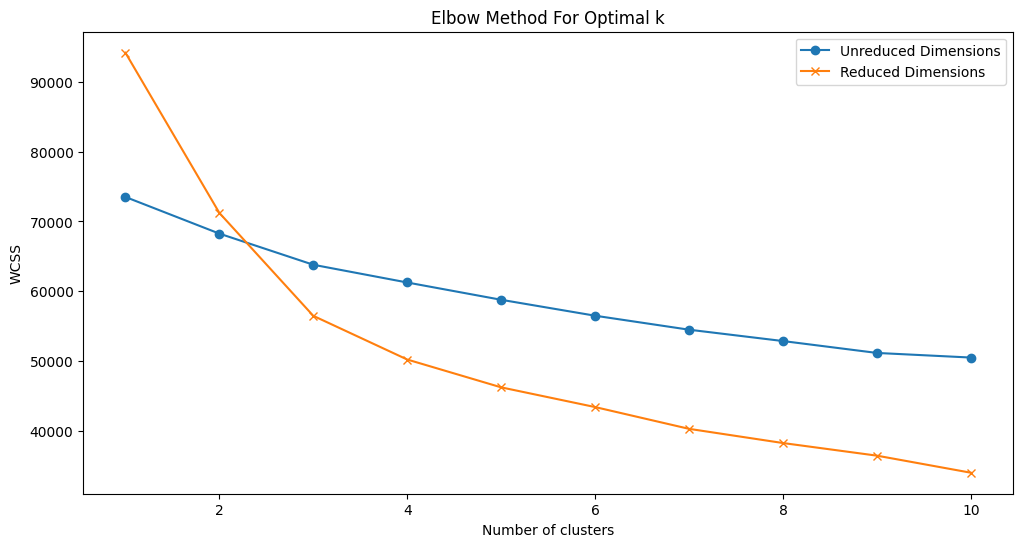

In [63]:
# create a line plot to show the " Pick optimal number of clusters using Elbow method" of the unreduced and reduced dimension Kmeans features 
# Compute WCSS for the reduced dimension data
wcss_reduced = []
for i in range(1, 11):
    kmeans_reduced = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_reduced.fit(encoded_data_reduced)
    wcss_reduced.append(kmeans_reduced.inertia_)

# Plot the WCSS for both unreduced and reduced dimension data
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', label='Unreduced Dimensions')
plt.plot(range(1, 11), wcss_reduced, marker='x', label='Reduced Dimensions')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [64]:
## Apply the resulting optimal k to find new centroids

# Apply KMeans with the optimal number of clusters to the encoded dataset
kmeans_encoded = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_encoded.fit(encoded_data_reduced)

# Get the centroids of the clusters
centroids = kmeans_encoded.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[ 7.3965936  3.8773718  1.5245227  6.6510777  8.427682   9.288008
  14.469268 ]
 [ 4.744938   4.3343806  2.8834443  5.316986   4.882946   4.7686677
  10.2445755]
 [ 3.3931005  9.726853   3.0882022  5.2858133  5.7823577 11.105503
   8.543496 ]]


In [ ]:
## Show the centroids shape
print("Shape of the centroids:", centroids.shape)


Shape of the centroids: (3, 7)


In [66]:
# show the clusters shape
print("Shape of the clusters:", encoded_df['Cluster'].shape)

Shape of the clusters: (1470,)


In [67]:
# concatenate the clusters to the data
# Concatenate the clusters to the encoded data
encoded_data_with_clusters = np.hstack((encoded_data_reduced, kmeans_encoded.labels_.reshape(-1, 1)))
encoded_data_with_clusters

array([[ 4.10488987,  9.01912117,  4.68139458, ..., 16.58912277,
        11.01517487,  2.        ],
       [ 5.63051701,  3.05288029,  3.82769704, ...,  0.71763122,
        16.25865555,  1.        ],
       [ 4.22196341,  1.4237268 ,  2.78904057, ...,  8.59499741,
         7.54731846,  1.        ],
       ...,
       [ 4.98810005,  5.4479866 ,  1.40472043, ...,  7.03517246,
        14.31093597,  0.        ],
       [ 0.96433985,  9.34902   ,  4.60331345, ...,  3.13075495,
         8.72610664,  1.        ],
       [ 2.35847521,  3.83578587,  1.95530748, ...,  5.04445076,
        11.84350395,  1.        ]])

In [68]:
# show the 'Number of samples" in your current consolidated
print(f"Number of samples in encoded_data: {encoded_data.shape[0]}")
print(f"Number of samples in encoded_data_reduced: {encoded_data_reduced.shape[0]}")
print(f"Number of samples in encoded_data_with_clusters: {encoded_data_with_clusters.shape[0]}")
print(f"Number of samples in encoded_df: {encoded_df.shape[0]}")

Number of samples in encoded_data: 1470
Number of samples in encoded_data_reduced: 1470
Number of samples in encoded_data_with_clusters: 1470
Number of samples in encoded_df: 1470


In [69]:
## Apply PCA to encoded dataset
# Apply PCA to the encoded dataset
pca = PCA(n_components=2)
principal_components_encoded = pca.fit_transform(encoded_data_reduced)

# Create a DataFrame with the two principal components
pca_encoded_df = pd.DataFrame(data=principal_components_encoded, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the cluster labels to the DataFrame
pca_encoded_df = pd.concat([pca_encoded_df, pd.DataFrame(kmeans_encoded.labels_, columns=['Cluster'])], axis=1)

# Display the first few rows of the DataFrame
pca_encoded_df.head()

,Principal Component 1,Principal Component 2,Cluster
0,-2.724478,8.283110,2
1,4.913633,-6.735337,1
2,-0.841062,-1.577970,1
3,7.145702,-4.268825,0
4,0.022470,-4.115398,1


In [72]:
# concatenate the clusters to the data
# Concatenate the clusters to the encoded data
encoded_data_with_clusters = np.hstack((encoded_data_reduced, kmeans_encoded.labels_.reshape(-1, 1)))
encoded_data_with_clusters

array([[ 4.10488987,  9.01912117,  4.68139458, ..., 16.58912277,
        11.01517487,  2.        ],
       [ 5.63051701,  3.05288029,  3.82769704, ...,  0.71763122,
        16.25865555,  1.        ],
       [ 4.22196341,  1.4237268 ,  2.78904057, ...,  8.59499741,
         7.54731846,  1.        ],
       ...,
       [ 4.98810005,  5.4479866 ,  1.40472043, ...,  7.03517246,
        14.31093597,  0.        ],
       [ 0.96433985,  9.34902   ,  4.60331345, ...,  3.13075495,
         8.72610664,  1.        ],
       [ 2.35847521,  3.83578587,  1.95530748, ...,  5.04445076,
        11.84350395,  1.        ]])

In [73]:
## Apply PCA to encoded dataset
# Apply PCA to the encoded dataset
pca = PCA(n_components=2)
principal_components_encoded = pca.fit_transform(encoded_data_reduced)

# Create a DataFrame with the two principal components
pca_encoded_df = pd.DataFrame(data=principal_components_encoded, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the cluster labels to the DataFrame
pca_encoded_df = pd.concat([pca_encoded_df, pd.DataFrame(kmeans_encoded.labels_, columns=['Cluster'])], axis=1)

# Display the first few rows of the DataFrame
pca_encoded_df.head()

,Principal Component 1,Principal Component 2,Cluster
0,-2.724478,8.283110,2
1,4.913633,-6.735337,1
2,-0.841062,-1.577970,1
3,7.145702,-4.268825,0
4,0.022470,-4.115398,1


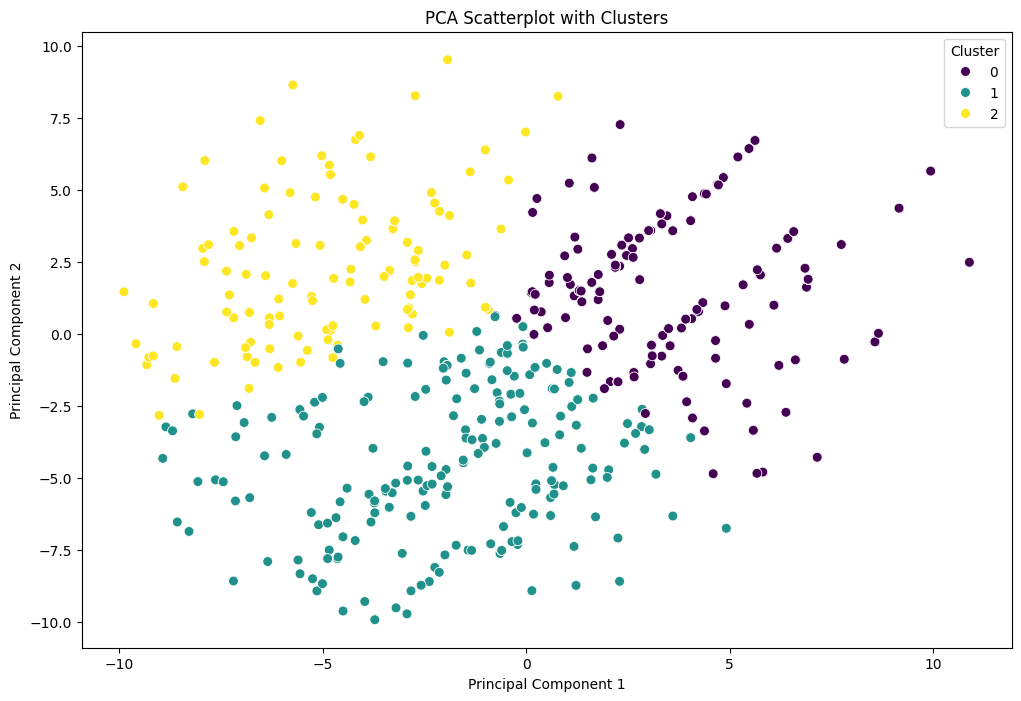

In [74]:
## Plot your pca scatterplot with clusters as the hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_encoded_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot with Clusters')
plt.legend(title='Cluster')
plt.show()